Consider the case in which all the users belong to class C1, and no information about the advertising and pricing curves is known beforehand. Apply the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import p3.retry.environment_3 as env
from p3.retry.GPTS_PriceOptimizer import GPTS_PriceOptimizer
from p3.retry.GPUCB_PriceOptimizer import GPUCB_PriceOptimizer
import utils.projectParameters as param

In [2]:
T = 50#365

class_id = 1
env = env.Environment(class_id)
opt = env.optimal

n_experiments = 2#10
ts_rewards_per_experiment = []
ucb_rewards_per_experiment = []

cumregret_ts = []
cumregret_ucb = []

cumreward_ts = []
cumreward_ucb = []

for e in range (0,n_experiments):
    # Create environment and learners
    gpts_and_price_optimizer = GPTS_PriceOptimizer(param.bids, param.prices)
    gpucb_and_price_optimizer = GPUCB_PriceOptimizer(param.bids, param.prices)

    for t in range (0,T):
        # Pull arms and update learners
        # Thompson sampling
        if t % 10 == 0:
            print(f"{t} of experiment {e}")
        pulled_arms = gpts_and_price_optimizer.pull_arms()
        pulled_bids_arm = pulled_arms[0]
        pulled_prices_arm = pulled_arms[1]
        round_reward = env.round(pulled_bids_arm, pulled_prices_arm)
        gpts_and_price_optimizer.update(pulled_bids_arm, pulled_prices_arm, *round_reward)


        # UCB
        pulled_arms = gpucb_and_price_optimizer.pull_arms()
        pulled_bids_arm = pulled_arms[0]
        pulled_prices_arm = pulled_arms[1]
        round_reward = env.round(pulled_bids_arm, pulled_prices_arm)
        gpucb_and_price_optimizer.update(pulled_bids_arm, pulled_prices_arm, *round_reward)
    # Store collected rewards
    ts_rewards_per_experiment.append(gpts_and_price_optimizer.collected_rewards)
    ucb_rewards_per_experiment.append(gpucb_and_price_optimizer.collected_rewards)

    cumregret_ts.append(np.cumsum(opt - ts_rewards_per_experiment[e]))
    cumregret_ucb.append(np.cumsum(opt - ucb_rewards_per_experiment[e]))

    cumreward_ts.append(np.cumsum(ts_rewards_per_experiment[e]))
    cumreward_ucb.append(np.cumsum(ucb_rewards_per_experiment[e]))

0 of experiment 0


c:\Users\Andrea\miniconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Andrea\miniconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


10 of experiment 0
20 of experiment 0
30 of experiment 0
40 of experiment 0
0 of experiment 1


c:\Users\Andrea\miniconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Andrea\miniconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Andrea\miniconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


10 of experiment 1
20 of experiment 1
30 of experiment 1
40 of experiment 1


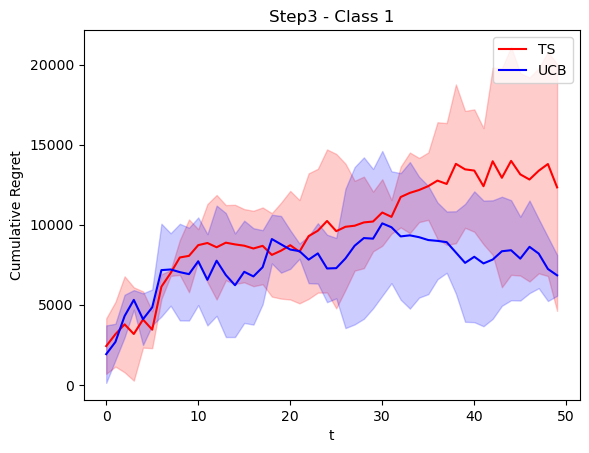

In [3]:
plt.figure(0)
plt.title(f"Step3 - Class {class_id}")
plt.xlabel("t")
plt.ylabel("Cumulative Regret")
plt.plot(np.mean(cumregret_ts, axis=0), 'r')
plt.plot(np.mean(cumregret_ucb, axis=0), 'b')
plt.fill_between(range(T), np.mean(cumregret_ts, axis=0) - np.std(cumregret_ts, axis=0), np.mean(cumregret_ts, axis=0) + np.std(cumregret_ts, axis=0), color = "red", alpha = 0.2)
plt.fill_between(range(T), np.mean(cumregret_ucb, axis=0) - np.std(cumregret_ucb, axis=0), np.mean(cumregret_ucb, axis=0) + np.std(cumregret_ucb, axis=0), color = "blue", alpha = 0.2)
plt.legend(["TS","UCB"])
plt.show()

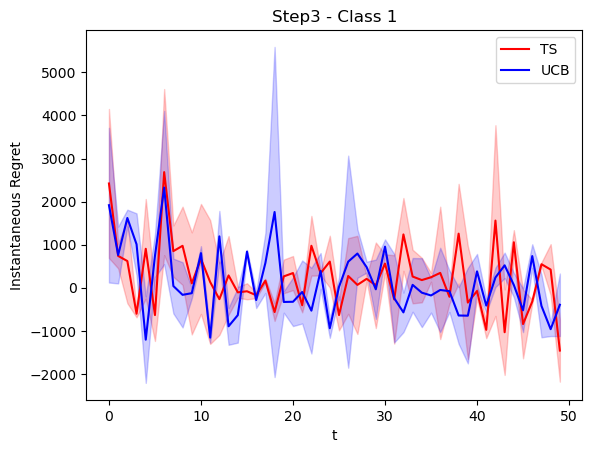

In [4]:
plt.figure(1)
plt.title(f"Step3 - Class {class_id}")
plt.xlabel("t")
plt.ylabel("Instantaneous Regret")
plt.plot(np.mean(opt - ts_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(opt - ucb_rewards_per_experiment, axis=0), 'b')
plt.fill_between(range(T), np.mean(opt - ts_rewards_per_experiment, axis=0) - np.std(opt - ts_rewards_per_experiment, axis=0), np.mean(opt - ts_rewards_per_experiment, axis=0) + np.std(opt - ts_rewards_per_experiment, axis=0), color = "red", alpha = 0.2)
plt.fill_between(range(T), np.mean(opt - ucb_rewards_per_experiment, axis=0) - np.std(opt - ucb_rewards_per_experiment, axis=0), np.mean(opt - ucb_rewards_per_experiment, axis=0) + np.std(opt - ucb_rewards_per_experiment, axis=0), color = "blue", alpha = 0.2)
plt.legend(["TS","UCB"])
plt.show()

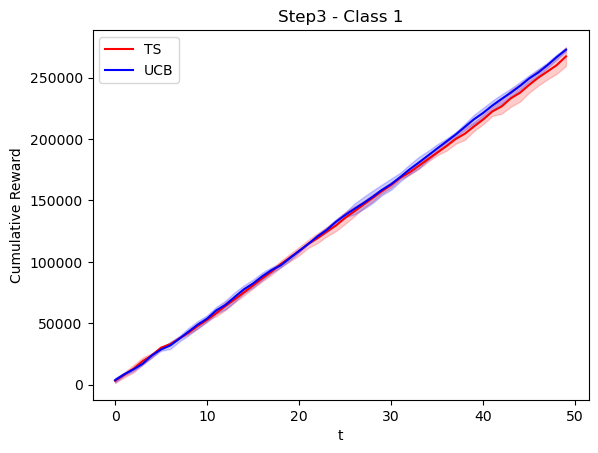

In [5]:
plt.figure(2)
plt.title(f"Step3 - Class {class_id}")
plt.xlabel("t")
plt.ylabel("Cumulative Reward")
plt.plot(np.mean(cumreward_ts, axis=0), 'r')
plt.plot(np.mean(cumreward_ucb, axis=0), 'b')
plt.fill_between(range(T), np.mean(cumreward_ts, axis=0) - np.std(cumreward_ts, axis=0), np.mean(cumreward_ts, axis=0) + np.std(cumreward_ts, axis=0), color = "red", alpha = 0.2)
plt.fill_between(range(T), np.mean(cumreward_ucb, axis=0) - np.std(cumreward_ucb, axis=0), np.mean(cumreward_ucb, axis=0) + np.std(cumreward_ucb, axis=0), color = "blue", alpha = 0.2)
plt.legend(["TS","UCB"])
plt.show()

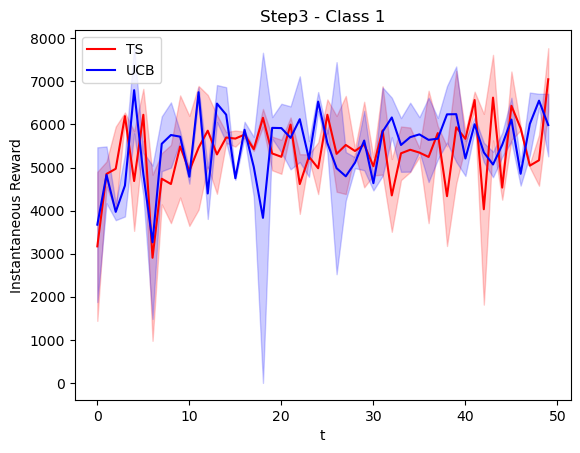

In [6]:
plt.figure(3)
plt.title(f"Step3 - Class {class_id}")
plt.xlabel("t")
plt.ylabel("Instantaneous Reward")
plt.plot(np.mean(ts_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(ucb_rewards_per_experiment, axis=0), 'b')
plt.fill_between(range(T), np.mean(ts_rewards_per_experiment, axis=0) - np.std(ts_rewards_per_experiment, axis=0), np.mean(ts_rewards_per_experiment, axis=0) + np.std(ts_rewards_per_experiment, axis=0), color = "red", alpha = 0.2)
plt.fill_between(range(T), np.mean(ucb_rewards_per_experiment, axis=0) - np.std(ucb_rewards_per_experiment, axis=0), np.mean(ucb_rewards_per_experiment, axis=0) + np.std(ucb_rewards_per_experiment, axis=0), color = "blue", alpha = 0.2)
plt.legend(["TS","UCB"])
plt.show()